# TP1 - Exploration et transformation des données
### Alain Nyeck - Folly Tata Ayeboua


In [1]:
#%pip install pandas numpy matplotlib ydata_profiling, sklearn
#%pip install ipywidgets

%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import time

## Étape 1 : On considère le fichier train_users_2.csv
* Indiquer les points marquants l'exploration.
* Pour chaque observation, indiquer l’opération à effectuer qui serait la plus appropriée.

In [2]:
df = pd.read_csv('train_users_2.csv', index_col=0)

In [3]:
print('\nAffichage du dataset\n')
display(df.head(10)) 


Affichage du dataset



,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
id,,,,,,,,,,,,,,,
gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US


In [4]:
#!pip install pandas_profiling
# from ydata_profiling import ProfileReport
# profile = ProfileReport(df)
# profile.to_file(output_file="dortie.html")


In [5]:
#%pip install sweetviz
# import numpy as np
# if not hasattr(np, 'VisibleDeprecationWarning'):
# 	np.VisibleDeprecationWarning = DeprecationWarning
# import sweetviz as sv
# report = sv.analyze(df)
# report.show_html("sortie.html")

### 1.1. Quels sont les descripteurs (colonnes) du dataset?

In [6]:
print("Les descripteurs du dataset:")
print(df.columns.tolist())

Les descripteurs du dataset:
['date_account_created', 'timestamp_first_active', 'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow', 'language', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser', 'country_destination']


### 1.2. Combien d'enregistrements (lignes) ont été fournis ?

In [7]:
nombre_enregistrements = df.shape[0]
print("Le nombre d'enregistrements:",nombre_enregistrements)

Le nombre d'enregistrements: 213451


### 1.3. Quel est le format des données. Par exemple, dans quel format les dates sont fournies, existe-t-il des valeurs numériques, à quoi ressemblent les différentes valeurs catégorielles ?

In [8]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
Index: 213451 entries, gxn3p5htnn to nw9fwlyb5f
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   date_account_created     213451 non-null  object 
 1   timestamp_first_active   213451 non-null  int64  
 2   date_first_booking       88908 non-null   object 
 3   gender                   213451 non-null  object 
 4   age                      125461 non-null  float64
 5   signup_method            213451 non-null  object 
 6   signup_flow              213451 non-null  int64  
 7   language                 213451 non-null  object 
 8   affiliate_channel        213451 non-null  object 
 9   affiliate_provider       213451 non-null  object 
 10  first_affiliate_tracked  207386 non-null  object 
 11  signup_app               213451 non-null  object 
 12  first_device_type        213451 non-null  object 
 13  first_browser            213451 non-null  object 
 

<span> Les données de types date: 'date_account_created', 'timestamp_first_active', 'date_first_booking'</span></br>
<span> Les données numériques: 'age', 'signup_flow'</span></br>
<span> Les données categorielles: 'gender', 'signup_method', 'language', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser', 'country_destination'</span></br></br>


<span>Les dates sont de types objet et int. elles seront converties en type datetime (format ci-dessous) pour en extraire proprement les champs</span></br>
<span>'date_account_created' utilise le format 'YYYY-MM-DD'</span></br>
<span>'timestamp_first_active' utilise le format 'YYYYMMDDhhmmss'</span></br>
<span>'date_first_booking' utilise le format 'YYYY-MM-DD'</span></br></br>

In [9]:
cols = ['gender', 'signup_method', 'signup_flow', 'language', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser', 'country_destination']

print('Ci-dessous les valeurs catégorielles:\n')
for col in cols:
    print(col,':', df[col].unique(), '\n')
 

Ci-dessous les valeurs catégorielles:

gender : ['-unknown-' 'MALE' 'FEMALE' 'OTHER'] 

signup_method : ['facebook' 'basic' 'google'] 

signup_flow : [ 0  3  2  1 24  8  6  5 10 25 12  4 16 15 20 21 23] 

language : ['en' 'fr' 'de' 'es' 'it' 'pt' 'zh' 'ko' 'ja' 'ru' 'pl' 'el' 'sv' 'nl'
 'hu' 'da' 'id' 'fi' 'no' 'tr' 'th' 'cs' 'hr' 'ca' 'is'] 

affiliate_channel : ['direct' 'seo' 'other' 'sem-non-brand' 'content' 'sem-brand'
 'remarketing' 'api'] 

affiliate_provider : ['direct' 'google' 'other' 'craigslist' 'facebook' 'vast' 'bing' 'meetup'
 'facebook-open-graph' 'email-marketing' 'yahoo' 'padmapper' 'gsp' 'wayn'
 'naver' 'baidu' 'yandex' 'daum'] 

first_affiliate_tracked : ['untracked' 'omg' nan 'linked' 'tracked-other' 'product' 'marketing'
 'local ops'] 

signup_app : ['Web' 'Moweb' 'iOS' 'Android'] 

first_device_type : ['Mac Desktop' 'Windows Desktop' 'iPhone' 'Other/Unknown'
 'Desktop (Other)' 'Android Tablet' 'iPad' 'Android Phone'
 'SmartPhone (Other)'] 

first_browser : ['Chro

### 1.4. Y a-t-il des valeurs manquantes?

In [10]:
print("Valeurs manquantes par colonne:\n")
print(df.isnull().sum())

Valeurs manquantes par colonne:

date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64


### 1.5. Est-ce qu’il y’a des dépendances évidentes au niveau des descripteurs?

<span>Oui, il peut exister des dépendances entre certains descripteurs. Par exemple, entre:</span></br>
<ul>
<li>('language', 'country_destination'): Un utilisateur qui s'inscrit avec la langue française a plus de chances de reserver en France</li>
<li>('date_account_created', 'timestamp_first_active', 'date_first_booking'): 'date_account_created' est toujours antérieure à 'timestamp_first_active' et 'date_first_booking' est toujours postérieure aux deux premières dates.  </li>
<li>('first_device_type', 'first_browser'): certains types d'appareils influencent fortement le navigateur utilisé</li>
<li>('affiliate_provider', 'affiliate_channel'): certains providers peuvent privilégier certains canaux.</li>


<span> Nous allons validé ces dépendances à l'aide ds matrices de corrélations ci-dessous</span>

#### Corrélations entre variables qualitatives

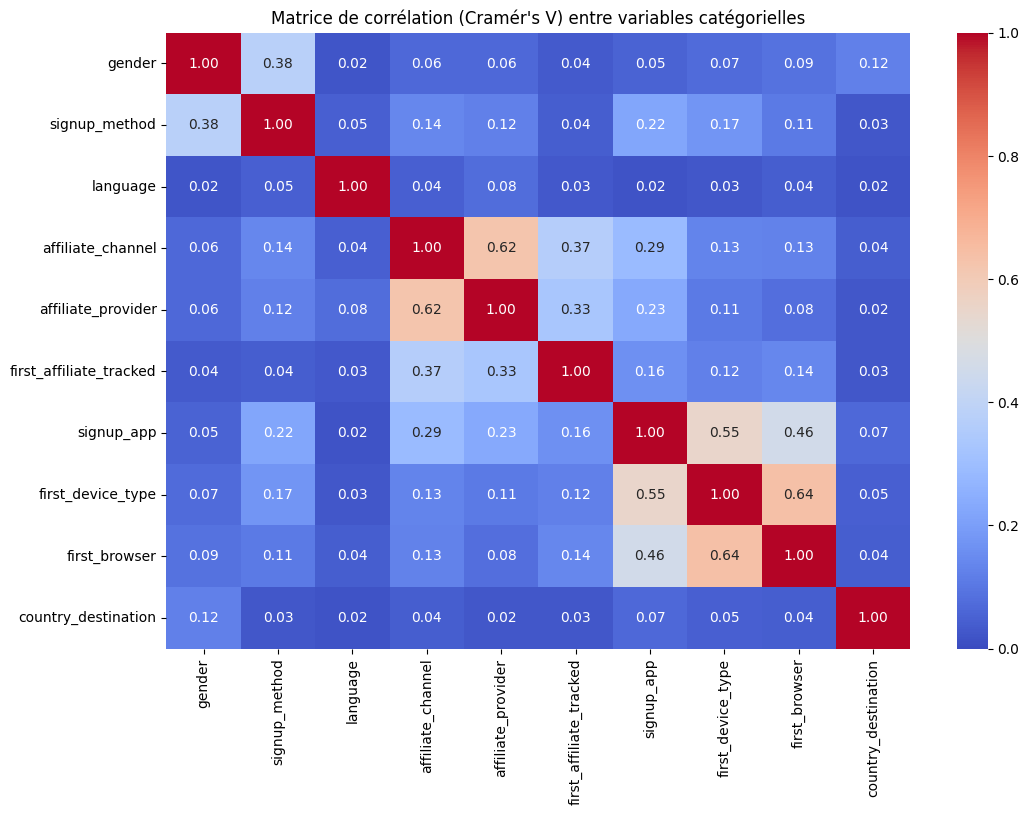

In [11]:
categorical_columns = [
    'gender', 'signup_method', 'language', 'affiliate_channel','affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser', 'country_destination'
]

# Fonction pour calculer le coefficient de Cramér
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Créer une matrice de corrélation
correlation_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

# Remplir la matrice avec les coefficients de Cramér
for col1 in categorical_columns:
    for col2 in categorical_columns:
        correlation_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Convertir la matrice en valeurs numériques
correlation_matrix = correlation_matrix.astype(float)

# Afficher la matrice de corrélation avec une heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=0, vmax=1)
plt.title("Matrice de corrélation (Cramér's V) entre variables catégorielles")
plt.show()

<span>La matrice de corrélation met en lumière les dépendances mentionnées précédemment</span>

#### Corrélations entre variables numériques

Nombre de cas où `timestamp_first_active` est postérieur à `date_account_created` : 213273


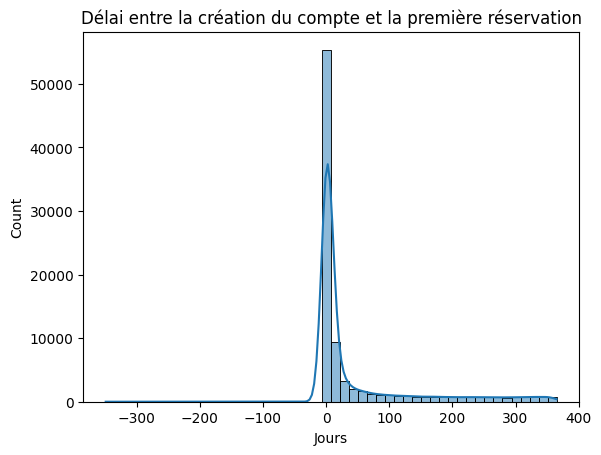

Dataset avec dates converties:



,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,timestamp_issue,booking_delay
id,,,,,,,,,,,,,,,,,
gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,False,NaN
820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,False,NaN
4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,False,-57.0
bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,False,278.0
87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,False,-208.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zxodksqpep,2014-06-30,2014-06-30 23:56:36,NaT,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF,True,NaN
mhewnxesx9,2014-06-30,2014-06-30 23:57:19,NaT,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF,True,NaN
6o3arsjbb4,2014-06-30,2014-06-30 23:57:54,NaT,-unknown-,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF,True,NaN


In [12]:
df_original = df.copy()  
# Vérifier les dépendances temporelles
# Vérifier que les timestamps sont bien ordonnés
df["date_account_created"] = pd.to_datetime(df["date_account_created"]) #Convesion de la colonne "date_account_created" en datet

# Conversion de la colonne 'date_account_created' en datetime si ce n'est pas déjà fait
df["timestamp_first_active"] = pd.to_datetime(df["timestamp_first_active"], format='%Y%m%d%H%M%S')
df["date_first_booking"] = pd.to_datetime(df["date_first_booking"])

# Vérifier si `timestamp_first_active` est toujours avant ou égal à `date_account_created`
df["timestamp_issue"] = df["timestamp_first_active"] > df["date_account_created"]
print("Nombre de cas où `timestamp_first_active` est postérieur à `date_account_created` :", df["timestamp_issue"].sum())

# Visualiser l'écart entre `date_account_created` et `date_first_booking`
df["booking_delay"] = (df["date_first_booking"] - df["date_account_created"]).dt.days
sns.histplot(df["booking_delay"].dropna(), bins=50, kde=True)
plt.title("Délai entre la création du compte et la première réservation")
plt.xlabel("Jours")
plt.show()

print('Dataset avec dates converties:\n')
display(df)

<span>Si timestamp_first_active est après date_account_created, il y a un problème dans les données.</span></br>
<span>La distribution des délais de réservation permet de voir combien de temps les utilisateurs attendent avant leur première réservation.</span>

id
820tgsjxq7    38.0
4ft3gnwmtx    56.0
bjjt8pjhuk    42.0
87mebub9p4    41.0
lsw9q7uk0j    46.0
              ... 
omlc9iku7t    34.0
0k26r3mir0    36.0
qbxza0xojf    23.0
zxodksqpep    32.0
6o3arsjbb4    32.0
Name: age, Length: 124522, dtype: float64

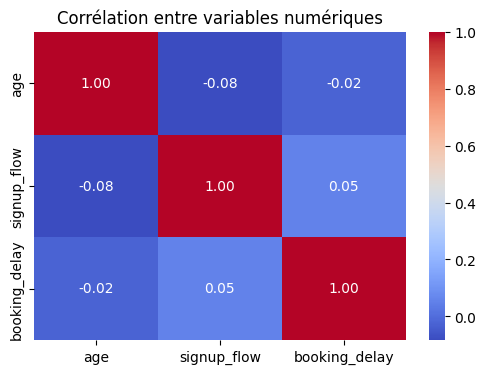

In [13]:

# Convertir l'âge en numérique et traiter les valeurs aberrantes
df["age"] = pd.to_numeric(df["age"], errors="coerce")
df_FilteredAge = df[(df["age"] > 17) & (df["age"] <= 120)]  # Filtrer des âges aberrants
display(df_FilteredAge['age'])

# Matrice de corrélation
num_vars = ["age", "signup_flow", "booking_delay"]
corr_matrix = df_FilteredAge[num_vars].corr()

# Affichage
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Corrélation entre variables numériques")
plt.show()

<span>La matrice de corrélation montre qu'il n'y a pas de dépendances entre les variables quantitatives</span>

### 1.6. D’autres observations sur le dataset qui pourraient être pertinentes ?

#### Boxplot de l'âge en fonction du pays de destination

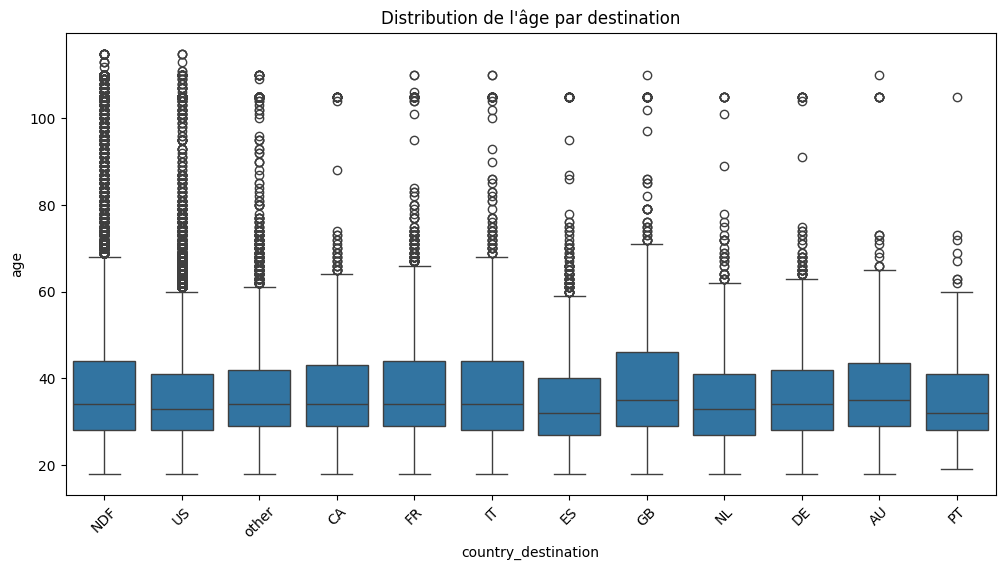

In [14]:
#L'âge semble être la seule variable continue intéressante pour un boxplot.
plt.figure(figsize=(12, 6))
sns.boxplot(x="country_destination", y="age", data=df_FilteredAge)
plt.xticks(rotation=45)
plt.title("Distribution de l'âge par destination")
plt.show()

#### Boxplot de l'âge selon le sexe :

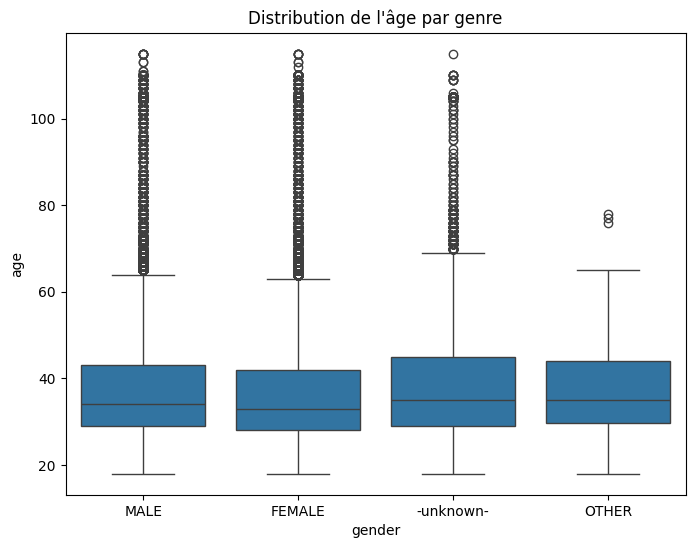

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="gender", y="age", data=df_FilteredAge)
plt.title("Distribution de l'âge par genre")
plt.show()

#### Boxplot de l'âge selon le canal d'affiliation :

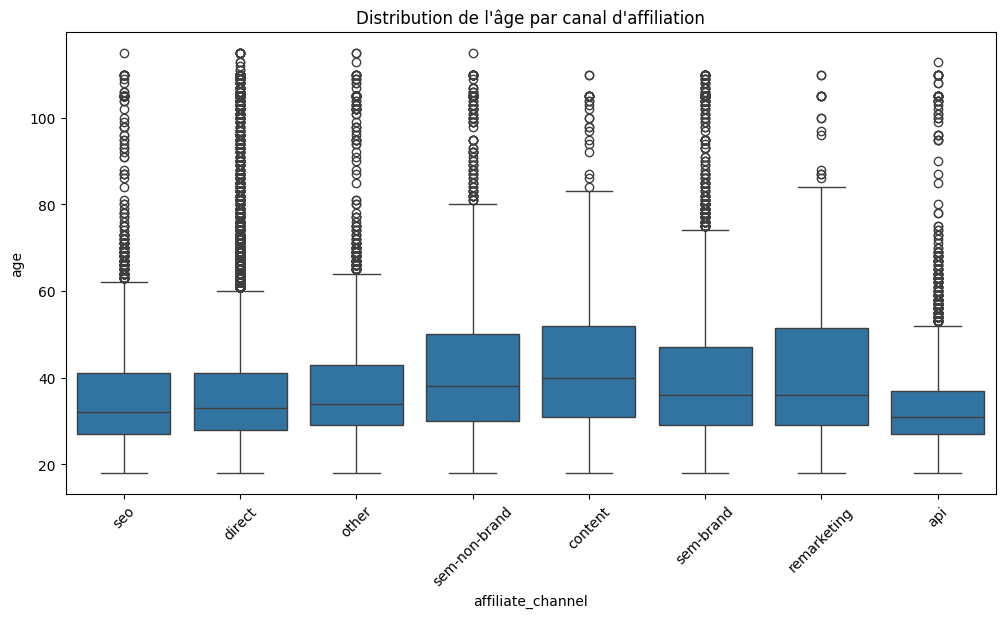

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="affiliate_channel", y="age", data=df_FilteredAge)
plt.xticks(rotation=45)
plt.title("Distribution de l'âge par canal d'affiliation")
plt.show()

#### Détection des valeurs aberrantes de l'âge (outliers)

In [17]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['age'] < (Q1 - 1.5 * IQR)) | (df['age'] > (Q3 + 1.5 * IQR))]
display(outliers[['age']])  # Liste des outliers

,age
id,
dgatsm5ocq,69.0
3qsa4lo7eg,5.0
47wdhtdini,72.0
uhbkw5exeg,70.0
kw7qyvlhsq,70.0
...,...
pw9nfo1ulb,95.0
y37l7vzjpa,66.0
jl5f10hu4t,69.0


In [18]:
print(df['age'].describe())

count    125461.000000
mean         49.668335
std         155.666612
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64


<span>On constate que la colonne 'age' contient des données abbérantes. Nous ferons un filtrage á l'étape 2.</span>

#### Relations entre variables catégorielles

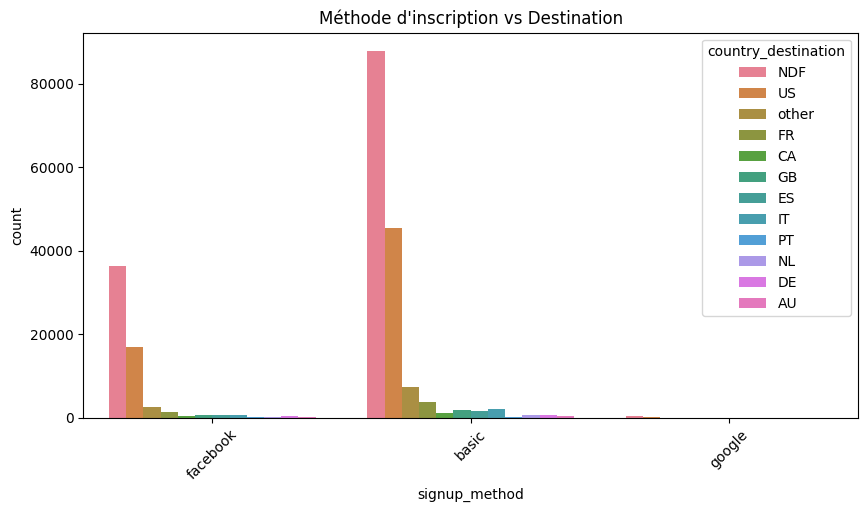

In [19]:
#Impact de signup_method sur country_destination
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="signup_method", hue="country_destination")
plt.title("Méthode d'inscription vs Destination")
plt.xticks(rotation=45)
plt.show()

<span>Certains modes d'inscription sont peut-être plus populaires pour certaines destinations. Par exemple, les utilisateurs inscrits via Google ou Facebook peuvent être différents de ceux inscrits par email.</span>

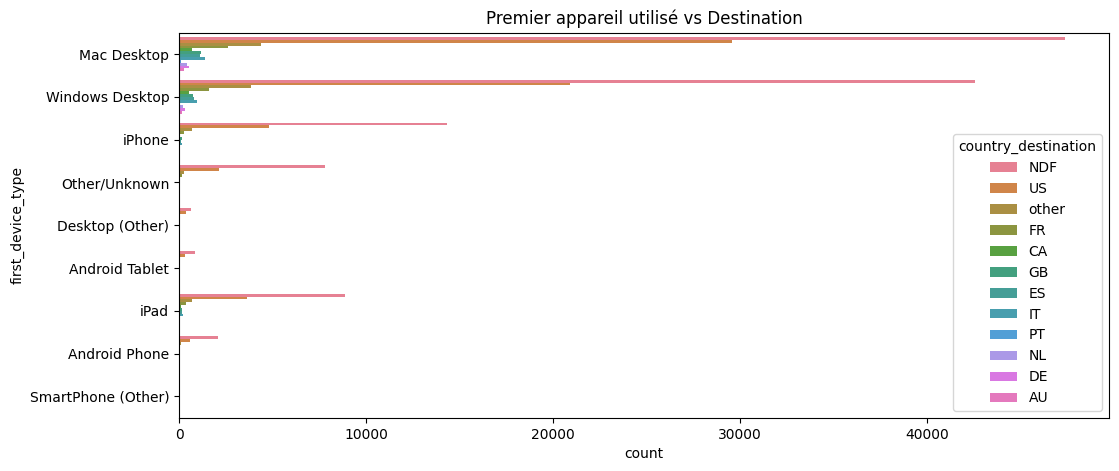

In [20]:
#Influence de first_device_type sur country_destination
plt.figure(figsize=(12, 5))
sns.countplot(data=df, y="first_device_type", hue="country_destination")
plt.title("Premier appareil utilisé vs Destination")
plt.show()

<span>On constate que les utilisateurs mobiles (iPhone, Android) réservent plus rapidement que ceux sur ordinateur</span>

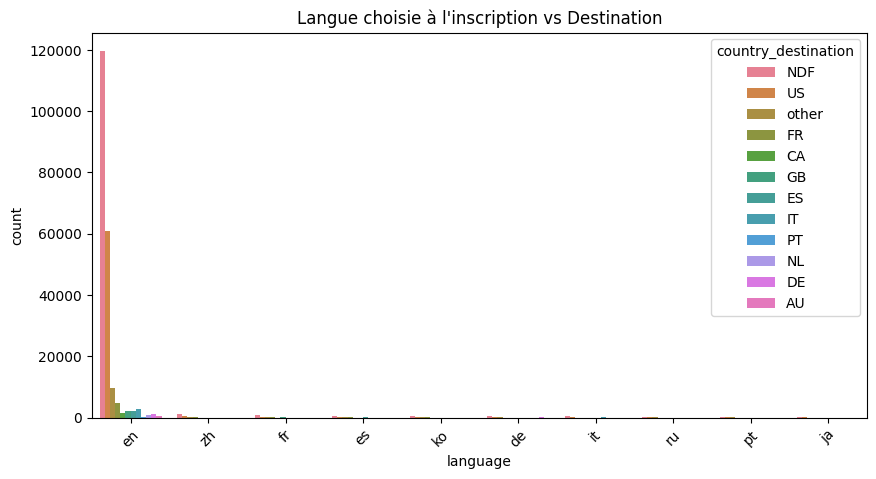

In [21]:
#Langue (language) et destination
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="language", hue="country_destination", order=df["language"].value_counts().index[:10])
plt.title("Langue choisie à l'inscription vs Destination")
plt.xticks(rotation=45)
plt.show()


<span>On confirme que La langue d'inscription influence la destination finale</span>

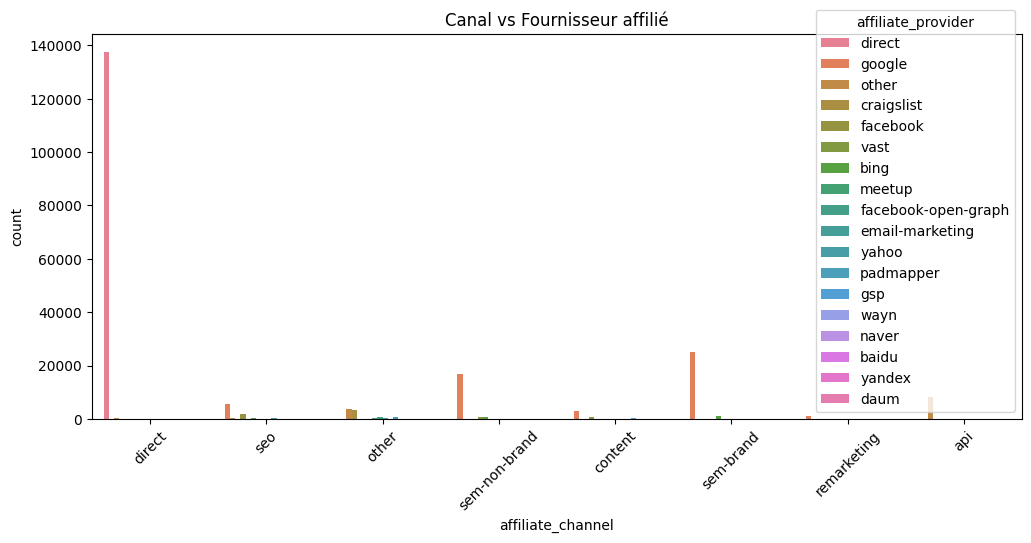

In [22]:
# Vérifier les relations entre affiliés
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x="affiliate_channel", hue="affiliate_provider")
plt.title("Canal vs Fournisseur affilié")
plt.xticks(rotation=45)
plt.show()

<span>Le diagramme ci-dessus confirme que certains fournisseurs affiliés sont spécialisés dans certains canaux de conversion</span>

## Étape 2 : On considère le fichier train_users_2.csv et test_users.csv
* Implémenter les correctifs soulignés dans l’étape 1.

In [23]:
#!pip install scikit-learn
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split


df_train = df_original.copy()

df_test = pd.read_csv('test_users.csv', index_col=0)

print("Données de Train:")
display(df_train)

print("Données de Test:")
display(df_test)

Données de Train:


,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
id,,,,,,,,,,,,,,,
gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zxodksqpep,2014-06-30,20140630235636,NaN,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF
mhewnxesx9,2014-06-30,20140630235719,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
6o3arsjbb4,2014-06-30,20140630235754,NaN,-unknown-,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF


Données de Test:


,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
id,,,,,,,,,,,,,,
5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cv0na2lf5a,2014-09-30,20140930235232,NaN,-unknown-,31.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,IE
zp8xfonng8,2014-09-30,20140930235306,NaN,-unknown-,NaN,basic,23,ko,direct,direct,untracked,Android,Android Phone,-unknown-
fa6260ziny,2014-09-30,20140930235408,NaN,-unknown-,NaN,basic,0,de,direct,direct,linked,Web,Windows Desktop,Firefox


In [24]:
import numpy as np
if not hasattr(np, 'VisibleDeprecationWarning'):
	np.VisibleDeprecationWarning = DeprecationWarning
import sweetviz as sv
comparison_report = sv.compare([df_train, "Train"], [df_test, "Test"])

# Sauvegarder et afficher le rapport
comparison_report.show_html("comparison_report.html")

                                             |      | [  0%]   00:00 -> (? left)

Report comparison_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


##### * Existance les doublons


In [25]:
print("Doublons dans les doneées de train:", df_train.duplicated().unique())
print("Doublons dans les doneées de test:", df_test.duplicated().unique())

Doublons dans les doneées de train: [False]
Doublons dans les doneées de test: [False]


### 2.1. Conversion de type/format (les dates)

#####  * Dataset de Training

In [26]:
df_train['date_account_created'] = pd.to_datetime(df_train['date_account_created'])
df_train.drop(['date_first_booking'], axis=1, inplace=True) # Supprimer la colonne 'date_first_booking' car elle est vide dans les données de test
#df_train.drop(['timestamp_first_active'], axis=1, inplace=True)
#df['timestamp_first_active'] = pd.to_datetime(df['timestamp_first_active'], format='%Y%m%d%H%M%S')
#df_train.drop(['signup_flow'], axis=1, inplace=True)


display(df_train)


,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
id,,,,,,,,,,,,,,
gxn3p5htnn,2010-06-28,20090319043255,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
820tgsjxq7,2011-05-25,20090523174809,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
4ft3gnwmtx,2010-09-28,20090609231247,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
bjjt8pjhuk,2011-12-05,20091031060129,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
87mebub9p4,2010-09-14,20091208061105,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zxodksqpep,2014-06-30,20140630235636,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF
mhewnxesx9,2014-06-30,20140630235719,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
6o3arsjbb4,2014-06-30,20140630235754,-unknown-,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF


##### * Dataset de Test

In [27]:
df_test['date_account_created'] = pd.to_datetime(df_test['date_account_created'])
df_test.drop(['date_first_booking'], axis=1, inplace=True)
#df_test.drop(['timestamp_first_active'], axis=1, inplace=True)
#df_test.drop(['signup_flow'], axis=1, inplace=True)
#df_test['timestamp_first_active'] = pd.to_datetime(df_test['timestamp_first_active'], format='%Y%m%d%H%M%S')

display(df_test)

,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
id,,,,,,,,,,,,,
5uwns89zht,2014-07-01,20140701000006,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
jtl0dijy2j,2014-07-01,20140701000051,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
xx0ulgorjt,2014-07-01,20140701000148,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
6c6puo6ix0,2014-07-01,20140701000215,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
czqhjk3yfe,2014-07-01,20140701000305,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari
...,...,...,...,...,...,...,...,...,...,...,...,...,...
cv0na2lf5a,2014-09-30,20140930235232,-unknown-,31.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,IE
zp8xfonng8,2014-09-30,20140930235306,-unknown-,NaN,basic,23,ko,direct,direct,untracked,Android,Android Phone,-unknown-
fa6260ziny,2014-09-30,20140930235408,-unknown-,NaN,basic,0,de,direct,direct,linked,Web,Windows Desktop,Firefox


### 2.2. Remplacement de valeurs manquantes

##### *  Dataset de Train

<span>La colonne 'age', présentant un nombre considérable (87990) de valeurs manquantes, nous utiliser une méthode de prédiction (RandomForest) au lieu d'un Immputer pour remplacer les données manquantes et évite d'aplatir la distribution des âges. C'est une méthode plus réaliste, surtout si l'âge a un impact sur la destination </span>

In [28]:
age_data = df_train[df_train['age'].notnull()]
age_target = age_data['age']
age_features = age_data.drop(['age'], axis=1).select_dtypes(include=[np.number])


age_model = RandomForestRegressor()
age_model.fit(age_features, age_target)

# Prédire les valeurs manquantes dans 'age'
missing_age_data = df_train[df_train['age'].isnull()]
predicted_ages = age_model.predict(missing_age_data.drop(['age'], axis=1).select_dtypes(include=[np.number]))
df_train.loc[df_train['age'].isnull(), 'age'] = predicted_ages  

display(df_train)


,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
id,,,,,,,,,,,,,,
gxn3p5htnn,2010-06-28,20090319043255,-unknown-,39.884667,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
820tgsjxq7,2011-05-25,20090523174809,MALE,38.000000,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
4ft3gnwmtx,2010-09-28,20090609231247,FEMALE,56.000000,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
bjjt8pjhuk,2011-12-05,20091031060129,FEMALE,42.000000,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
87mebub9p4,2010-09-14,20091208061105,-unknown-,41.000000,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zxodksqpep,2014-06-30,20140630235636,MALE,32.000000,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF
mhewnxesx9,2014-06-30,20140630235719,-unknown-,35.648634,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
6o3arsjbb4,2014-06-30,20140630235754,-unknown-,32.000000,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF


<span>Remplacement des valeurs manquantes de 'first_affiliate_tracked' par sa valeur médiane</span>

In [29]:
# c. Remplacement de first_affiliate_tracked avec la médiane
df_train['first_affiliate_tracked'].fillna(df_train['first_affiliate_tracked'].mode()[0], inplace=True)

/var/folders/dz/dt7pkrls1kxg9y931v65tmz40000gn/T/ipykernel_99402/3441638130.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['first_affiliate_tracked'].fillna(df_train['first_affiliate_tracked'].mode()[0], inplace=True)


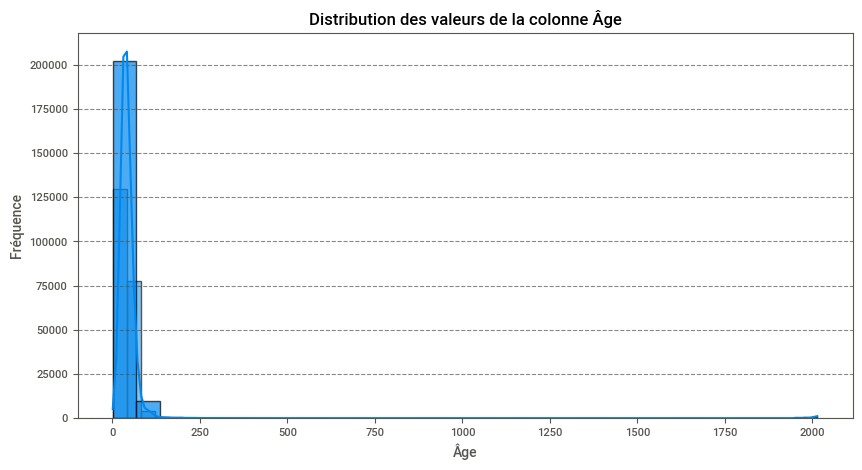

In [30]:
# Afficher la distribution des valeurs de la colonne 'age'
plt.figure(figsize=(10, 5))
sns.histplot(df_train["age"].dropna(), bins=50, kde=True)
plt.hist(df_train['age'].dropna(), bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.title('Distribution des valeurs de la colonne Âge')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<span>On constate la présence de valeurs aberrantes dans la colonne 'age'. Pour y remédier, nous supprimons les enregistrements où l'âge est inférieur à 15 ou supérieur à 120.</span>

In [31]:
# 3. Correction/Suppression de valeurs aberrantes/erronées
df_train = df_train[(df_train['age'] >= 15) & (df_train['age'] <= 120)]  # Suppression des âges aberrants
df_train['age'] = df_train['age'].astype(int)

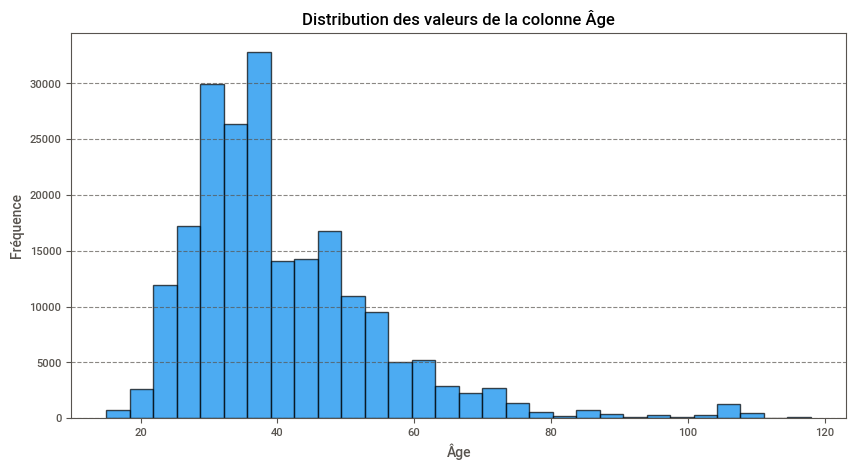

In [32]:
# Afficher la distribution des valeurs de la colonne 'age'
plt.figure(figsize=(10, 5))
plt.hist(df_train['age'].dropna(), bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.title('Distribution des valeurs de la colonne Âge')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [33]:
from scipy import stats

# Effectuer le test de D'Agostino and Pearson
stat, p_value = stats.normaltest(df_train['age'].dropna())

# Afficher le résultat du test
print(f"Statistique de D'Agostino : {stat}")
print(f"Valeur p : {p_value}")

# Interprétation du test
if p_value > 0.05:
    print("La distribution de l'âge suit une loi normale (pas de rejet de l'hypothèse nulle).")
else:
    print("La distribution de l'âge ne suit pas une loi normale (hypothèse nulle rejetée).")

Statistique de D'Agostino : 71670.15874238352
Valeur p : 0.0
La distribution de l'âge ne suit pas une loi normale (hypothèse nulle rejetée).


Ayant eliminé les outliers, la plage des âges se situe entre 15 et 120. Nous allons appliquer le MinMaxScaler pour la standardisation de la colonne Age.

In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Appliquer le scaler sur les données numériques
df_train['age'] = scaler.fit_transform(df_train[['age']])

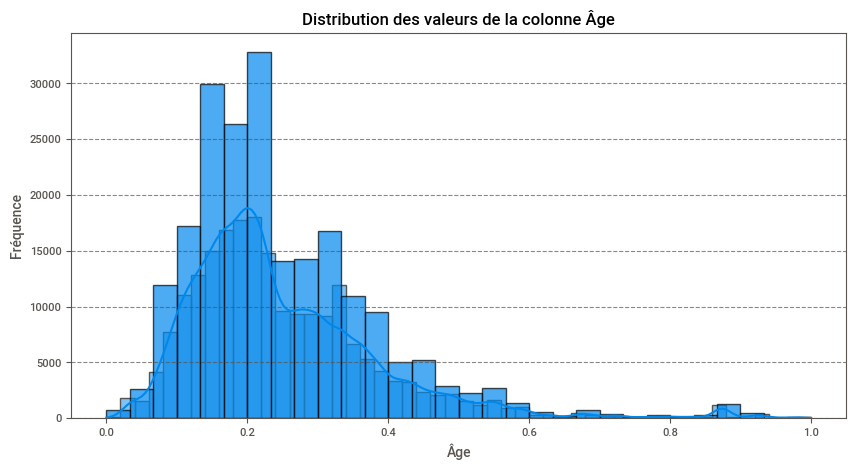

In [35]:
# Afficher la distribution des valeurs de la colonne 'age'
plt.figure(figsize=(10, 5))
sns.histplot(df_train["age"].dropna(), bins=50, kde=True)
plt.hist(df_train['age'].dropna(), bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.title('Distribution des valeurs de la colonne Âge')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [36]:

display(df_train)


,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
id,,,,,,,,,,,,,,
gxn3p5htnn,2010-06-28,20090319043255,-unknown-,0.233010,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
820tgsjxq7,2011-05-25,20090523174809,MALE,0.223301,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
4ft3gnwmtx,2010-09-28,20090609231247,FEMALE,0.398058,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
bjjt8pjhuk,2011-12-05,20091031060129,FEMALE,0.262136,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
87mebub9p4,2010-09-14,20091208061105,-unknown-,0.252427,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zxodksqpep,2014-06-30,20140630235636,MALE,0.165049,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF
mhewnxesx9,2014-06-30,20140630235719,-unknown-,0.194175,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
6o3arsjbb4,2014-06-30,20140630235754,-unknown-,0.165049,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF


##### * Dataset de Test 

<span>Les commentaires du dataset de train s'appliquent aussi pour le test.</span>

In [37]:
print(df_test.describe())
print("Valeurs manquantes par colonne:\n")
print(df_test.isnull().sum())  # Compte les valeurs manquantes par colonne

                date_account_created  timestamp_first_active           age  \
count                          62096            6.209600e+04  33220.000000   
mean   2014-08-14 19:24:31.631022848            2.014081e+13     37.616677   
min              2014-07-01 00:00:00            2.014070e+13      1.000000   
25%              2014-07-24 00:00:00            2.014072e+13     26.000000   
50%              2014-08-14 00:00:00            2.014081e+13     31.000000   
75%              2014-09-05 00:00:00            2.014091e+13     40.000000   
max              2014-09-30 00:00:00            2.014093e+13   2002.000000   
std                              NaN            8.024585e+07     74.440647   

        signup_flow  
count  62096.000000  
mean       7.813885  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       23.000000  
max       25.000000  
std       11.254291  
Valeurs manquantes par colonne:

date_account_created           0
timestamp_first_active         0


In [38]:
age_data = df_test[df_test['age'].notnull()]
age_target = age_data['age']
age_features = age_data.drop(['age'], axis=1).select_dtypes(include=[np.number])

age_model = RandomForestRegressor()
age_model.fit(age_features, age_target)

# Prédire les valeurs manquantes dans 'age'
missing_age_data = df_test[df_test['age'].isnull()]
predicted_ages = age_model.predict(missing_age_data.drop(['age'], axis=1).select_dtypes(include=[np.number]))
df_test.loc[df_test['age'].isnull(), 'age'] = predicted_ages

In [39]:
# c. Remplacement de first_affiliate_tracked avec la médiane

df_test['first_affiliate_tracked'].fillna(df_test['first_affiliate_tracked'].mode()[0], inplace=True)

/var/folders/dz/dt7pkrls1kxg9y931v65tmz40000gn/T/ipykernel_99402/961816202.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['first_affiliate_tracked'].fillna(df_test['first_affiliate_tracked'].mode()[0], inplace=True)


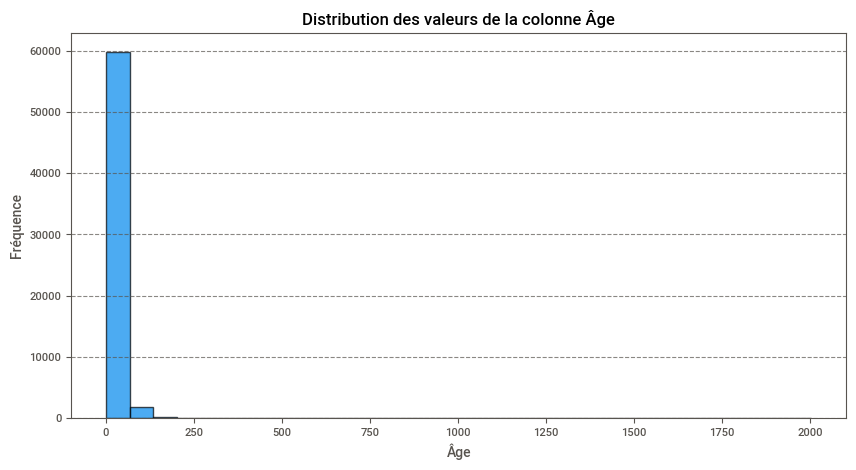

In [40]:
# Afficher la distribution des valeurs de la colonne 'age'
plt.figure(figsize=(10, 5))
plt.hist(df_test['age'].dropna(), bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.title('Distribution des valeurs de la colonne Âge')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [41]:
# 3. Correction/Suppression de valeurs aberrantes/erronées
df_test = df_test[(df_test['age'] >= 15) & (df_test['age'] <= 120)]  # Suppression des âges aberrants
df_test['age'] = df_test['age'].astype(int)

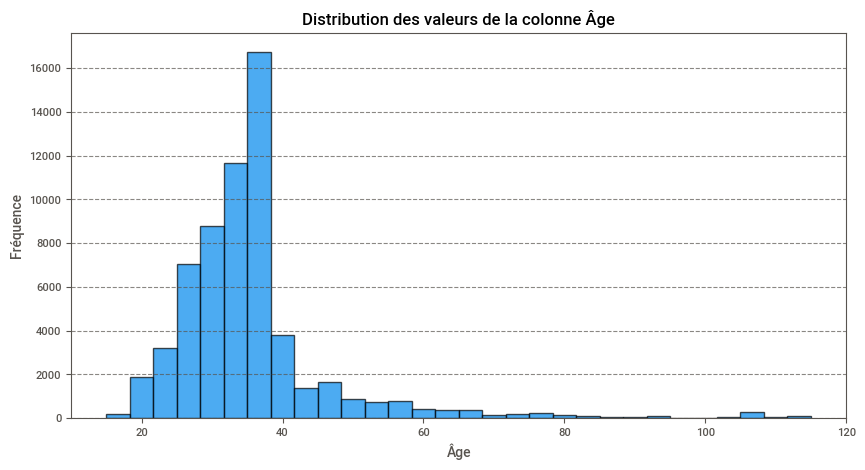

In [42]:
# Afficher la distribution des valeurs de la colonne 'age'
plt.figure(figsize=(10, 5))
plt.hist(df_test['age'].dropna(), bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.title('Distribution des valeurs de la colonne Âge')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [43]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Appliquer le scaler sur les données numériques
df_test['age'] = scaler.fit_transform(df_test[['age']])

In [44]:
display(df_test)

,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
id,,,,,,,,,,,,,
5uwns89zht,2014-07-01,20140701000006,FEMALE,0.20,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
jtl0dijy2j,2014-07-01,20140701000051,-unknown-,0.20,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
xx0ulgorjt,2014-07-01,20140701000148,-unknown-,0.20,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
6c6puo6ix0,2014-07-01,20140701000215,-unknown-,0.20,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
czqhjk3yfe,2014-07-01,20140701000305,-unknown-,0.20,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari
...,...,...,...,...,...,...,...,...,...,...,...,...,...
cv0na2lf5a,2014-09-30,20140930235232,-unknown-,0.16,basic,0,en,direct,direct,untracked,Web,Windows Desktop,IE
zp8xfonng8,2014-09-30,20140930235306,-unknown-,0.20,basic,23,ko,direct,direct,untracked,Android,Android Phone,-unknown-
fa6260ziny,2014-09-30,20140930235408,-unknown-,0.20,basic,0,de,direct,direct,linked,Web,Windows Desktop,Firefox


### 2.3. Standardisation de la dataset train

In [45]:
import pandas as pd

df_qualitatives = df_train.select_dtypes(include=['object'])
df_quantitatives = df_train.select_dtypes(include=[np.number])
df_dates = df_train.select_dtypes(include=['datetime64'])
target = df_train['country_destination']

display(df_qualitatives)
display(df_quantitatives)
display(df_dates)
display(target)

,gender,signup_method,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
id,,,,,,,,,,
gxn3p5htnn,-unknown-,facebook,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
820tgsjxq7,MALE,facebook,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
4ft3gnwmtx,FEMALE,basic,en,direct,direct,untracked,Web,Windows Desktop,IE,US
bjjt8pjhuk,FEMALE,facebook,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
87mebub9p4,-unknown-,basic,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
...,...,...,...,...,...,...,...,...,...,...
zxodksqpep,MALE,basic,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF
mhewnxesx9,-unknown-,basic,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
6o3arsjbb4,-unknown-,basic,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF


,timestamp_first_active,age,signup_flow
id,,,
gxn3p5htnn,20090319043255,0.233010,0
820tgsjxq7,20090523174809,0.223301,0
4ft3gnwmtx,20090609231247,0.398058,3
bjjt8pjhuk,20091031060129,0.262136,0
87mebub9p4,20091208061105,0.252427,0
...,...,...,...
zxodksqpep,20140630235636,0.165049,0
mhewnxesx9,20140630235719,0.194175,0
6o3arsjbb4,20140630235754,0.165049,0


,date_account_created
id,
gxn3p5htnn,2010-06-28
820tgsjxq7,2011-05-25
4ft3gnwmtx,2010-09-28
bjjt8pjhuk,2011-12-05
87mebub9p4,2010-09-14
...,...
zxodksqpep,2014-06-30
mhewnxesx9,2014-06-30
6o3arsjbb4,2014-06-30


id
gxn3p5htnn      NDF
820tgsjxq7      NDF
4ft3gnwmtx       US
bjjt8pjhuk    other
87mebub9p4       US
              ...  
zxodksqpep      NDF
mhewnxesx9      NDF
6o3arsjbb4      NDF
jh95kwisub      NDF
nw9fwlyb5f      NDF
Name: country_destination, Length: 211405, dtype: object

#### Encodage des variables catégorielles de la dataset train

Dans cette étape, nous appliquons le Frequency Encoding afin de convertir les données catégorielles en format numérique et normalisées. Cette transformation crée des indicateurs binaires pour chaque modalité.
Notre choix s'est porté sur le Frequency Encoding pour sa simplicité, son efficacité et les modalités de notre dataset ne sont pas des variables ordinales et leur frequence est unique.

In [46]:
df_qualitatives = df_qualitatives.drop(['country_destination'], axis=1)
colonnes_qualitatives = df_qualitatives.select_dtypes(include=['object']).columns

In [47]:

df_encoded = pd.DataFrame()

for col in colonnes_qualitatives:
    frequency_map = df_train[col].value_counts(normalize=True).to_dict()
    df_encoded[col] = df_train[col].map(frequency_map)


display(df_encoded)

,gender,signup_method,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
id,,,,,,,,,
gxn3p5htnn,0.447444,0.282666,0.966477,0.645042,0.643712,0.539065,0.857510,0.421097,0.300296
820tgsjxq7,0.255855,0.282666,0.966477,0.040642,0.242700,0.539065,0.857510,0.421097,0.300296
4ft3gnwmtx,0.295390,0.714751,0.966477,0.645042,0.643712,0.539065,0.857510,0.341596,0.098877
bjjt8pjhuk,0.295390,0.282666,0.966477,0.645042,0.643712,0.539065,0.857510,0.421097,0.157981
87mebub9p4,0.447444,0.714751,0.966477,0.645042,0.643712,0.539065,0.857510,0.421097,0.300296
...,...,...,...,...,...,...,...,...,...
zxodksqpep,0.255855,0.714751,0.966477,0.122485,0.242700,0.206906,0.857510,0.421097,0.212214
mhewnxesx9,0.447444,0.714751,0.966477,0.645042,0.643712,0.217105,0.857510,0.341596,0.300296
6o3arsjbb4,0.447444,0.714751,0.966477,0.645042,0.643712,0.539065,0.857510,0.421097,0.157981


In [48]:
train = pd.concat([df_dates, df_quantitatives, df_encoded], axis=1)

display(df_dates)
display(df_quantitatives)
display(df_encoded)

,date_account_created
id,
gxn3p5htnn,2010-06-28
820tgsjxq7,2011-05-25
4ft3gnwmtx,2010-09-28
bjjt8pjhuk,2011-12-05
87mebub9p4,2010-09-14
...,...
zxodksqpep,2014-06-30
mhewnxesx9,2014-06-30
6o3arsjbb4,2014-06-30


,timestamp_first_active,age,signup_flow
id,,,
gxn3p5htnn,20090319043255,0.233010,0
820tgsjxq7,20090523174809,0.223301,0
4ft3gnwmtx,20090609231247,0.398058,3
bjjt8pjhuk,20091031060129,0.262136,0
87mebub9p4,20091208061105,0.252427,0
...,...,...,...
zxodksqpep,20140630235636,0.165049,0
mhewnxesx9,20140630235719,0.194175,0
6o3arsjbb4,20140630235754,0.165049,0


,gender,signup_method,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
id,,,,,,,,,
gxn3p5htnn,0.447444,0.282666,0.966477,0.645042,0.643712,0.539065,0.857510,0.421097,0.300296
820tgsjxq7,0.255855,0.282666,0.966477,0.040642,0.242700,0.539065,0.857510,0.421097,0.300296
4ft3gnwmtx,0.295390,0.714751,0.966477,0.645042,0.643712,0.539065,0.857510,0.341596,0.098877
bjjt8pjhuk,0.295390,0.282666,0.966477,0.645042,0.643712,0.539065,0.857510,0.421097,0.157981
87mebub9p4,0.447444,0.714751,0.966477,0.645042,0.643712,0.539065,0.857510,0.421097,0.300296
...,...,...,...,...,...,...,...,...,...
zxodksqpep,0.255855,0.714751,0.966477,0.122485,0.242700,0.206906,0.857510,0.421097,0.212214
mhewnxesx9,0.447444,0.714751,0.966477,0.645042,0.643712,0.217105,0.857510,0.341596,0.300296
6o3arsjbb4,0.447444,0.714751,0.966477,0.645042,0.643712,0.539065,0.857510,0.421097,0.157981


In [49]:
train.drop(['timestamp_first_active'], axis=1, inplace=True)
train.drop(['signup_flow'], axis=1, inplace=True)

display(train)

,date_account_created,age,gender,signup_method,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
id,,,,,,,,,,,
gxn3p5htnn,2010-06-28,0.233010,0.447444,0.282666,0.966477,0.645042,0.643712,0.539065,0.857510,0.421097,0.300296
820tgsjxq7,2011-05-25,0.223301,0.255855,0.282666,0.966477,0.040642,0.242700,0.539065,0.857510,0.421097,0.300296
4ft3gnwmtx,2010-09-28,0.398058,0.295390,0.714751,0.966477,0.645042,0.643712,0.539065,0.857510,0.341596,0.098877
bjjt8pjhuk,2011-12-05,0.262136,0.295390,0.282666,0.966477,0.645042,0.643712,0.539065,0.857510,0.421097,0.157981
87mebub9p4,2010-09-14,0.252427,0.447444,0.714751,0.966477,0.645042,0.643712,0.539065,0.857510,0.421097,0.300296
...,...,...,...,...,...,...,...,...,...,...,...
zxodksqpep,2014-06-30,0.165049,0.255855,0.714751,0.966477,0.122485,0.242700,0.206906,0.857510,0.421097,0.212214
mhewnxesx9,2014-06-30,0.194175,0.447444,0.714751,0.966477,0.645042,0.643712,0.217105,0.857510,0.341596,0.300296
6o3arsjbb4,2014-06-30,0.165049,0.447444,0.714751,0.966477,0.645042,0.643712,0.539065,0.857510,0.421097,0.157981


#### Standardisation de la dataset Test

In [50]:
df_qualitatives = df_test.select_dtypes(include=['object'])
df_quantitatives = df_test.select_dtypes(include=[np.number])
df_dates = df_test.select_dtypes(include=['datetime64'])

display(df_qualitatives)
display(df_quantitatives)
display(df_dates)


,gender,signup_method,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
id,,,,,,,,,
5uwns89zht,FEMALE,facebook,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
jtl0dijy2j,-unknown-,basic,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
xx0ulgorjt,-unknown-,basic,en,direct,direct,linked,Web,Windows Desktop,Chrome
6c6puo6ix0,-unknown-,basic,en,direct,direct,linked,Web,Windows Desktop,IE
czqhjk3yfe,-unknown-,basic,en,direct,direct,untracked,Web,Mac Desktop,Safari
...,...,...,...,...,...,...,...,...,...
cv0na2lf5a,-unknown-,basic,en,direct,direct,untracked,Web,Windows Desktop,IE
zp8xfonng8,-unknown-,basic,ko,direct,direct,untracked,Android,Android Phone,-unknown-
fa6260ziny,-unknown-,basic,de,direct,direct,linked,Web,Windows Desktop,Firefox


,timestamp_first_active,age,signup_flow
id,,,
5uwns89zht,20140701000006,0.20,0
jtl0dijy2j,20140701000051,0.20,0
xx0ulgorjt,20140701000148,0.20,0
6c6puo6ix0,20140701000215,0.20,0
czqhjk3yfe,20140701000305,0.20,0
...,...,...,...
cv0na2lf5a,20140930235232,0.16,0
zp8xfonng8,20140930235306,0.20,23
fa6260ziny,20140930235408,0.20,0


,date_account_created
id,
5uwns89zht,2014-07-01
jtl0dijy2j,2014-07-01
xx0ulgorjt,2014-07-01
6c6puo6ix0,2014-07-01
czqhjk3yfe,2014-07-01
...,...
cv0na2lf5a,2014-09-30
zp8xfonng8,2014-09-30
fa6260ziny,2014-09-30


#### Encodage des variables catégorielles de la dataset test

Dans cette étape, nous appliquons le Frequency Encoding afin de convertir les données catégorielles en format numérique et normalisées. Cette transformation crée des indicateurs binaires pour chaque modalité.
Notre choix s'est porté sur le Frequency Encoding pour sa simplicité, son efficacité et les modalités de notre dataset ne sont pas des variables ordinales et leur frequence est unique.

In [51]:
df_encoded = pd.DataFrame()

for col in colonnes_qualitatives:
    frequency_map = df_test[col].value_counts(normalize=True).to_dict()
    df_encoded[col] = df_test[col].map(frequency_map)


display(df_encoded)


,gender,signup_method,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
id,,,,,,,,,
5uwns89zht,0.234796,0.241227,0.953947,0.703837,0.703837,0.543496,0.069112,0.308358,0.168104
jtl0dijy2j,0.541190,0.734301,0.953947,0.703837,0.703837,0.543496,0.069112,0.308358,0.168104
xx0ulgorjt,0.541190,0.734301,0.953947,0.703837,0.703837,0.256085,0.603936,0.231013,0.240642
6c6puo6ix0,0.541190,0.734301,0.953947,0.703837,0.703837,0.256085,0.603936,0.231013,0.059677
czqhjk3yfe,0.541190,0.734301,0.953947,0.703837,0.703837,0.543496,0.603936,0.271594,0.132037
...,...,...,...,...,...,...,...,...,...
cv0na2lf5a,0.541190,0.734301,0.953947,0.703837,0.703837,0.543496,0.603936,0.231013,0.059677
zp8xfonng8,0.541190,0.734301,0.005862,0.703837,0.703837,0.543496,0.075202,0.101557,0.270294
fa6260ziny,0.541190,0.734301,0.003914,0.703837,0.703837,0.256085,0.603936,0.231013,0.081356


In [52]:
test = pd.concat([df_dates, df_quantitatives, df_encoded], axis=1)

In [53]:
test.drop(['timestamp_first_active'], axis=1, inplace=True)
test.drop(['signup_flow'], axis=1, inplace=True)

In [54]:
print("Data de training:")
display(train)

Data de training:


,date_account_created,age,gender,signup_method,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
id,,,,,,,,,,,
gxn3p5htnn,2010-06-28,0.233010,0.447444,0.282666,0.966477,0.645042,0.643712,0.539065,0.857510,0.421097,0.300296
820tgsjxq7,2011-05-25,0.223301,0.255855,0.282666,0.966477,0.040642,0.242700,0.539065,0.857510,0.421097,0.300296
4ft3gnwmtx,2010-09-28,0.398058,0.295390,0.714751,0.966477,0.645042,0.643712,0.539065,0.857510,0.341596,0.098877
bjjt8pjhuk,2011-12-05,0.262136,0.295390,0.282666,0.966477,0.645042,0.643712,0.539065,0.857510,0.421097,0.157981
87mebub9p4,2010-09-14,0.252427,0.447444,0.714751,0.966477,0.645042,0.643712,0.539065,0.857510,0.421097,0.300296
...,...,...,...,...,...,...,...,...,...,...,...
zxodksqpep,2014-06-30,0.165049,0.255855,0.714751,0.966477,0.122485,0.242700,0.206906,0.857510,0.421097,0.212214
mhewnxesx9,2014-06-30,0.194175,0.447444,0.714751,0.966477,0.645042,0.643712,0.217105,0.857510,0.341596,0.300296
6o3arsjbb4,2014-06-30,0.165049,0.447444,0.714751,0.966477,0.645042,0.643712,0.539065,0.857510,0.421097,0.157981


In [55]:
print("Dataset Target:")
display(target)

target.unique()

Dataset Target:


id
gxn3p5htnn      NDF
820tgsjxq7      NDF
4ft3gnwmtx       US
bjjt8pjhuk    other
87mebub9p4       US
              ...  
zxodksqpep      NDF
mhewnxesx9      NDF
6o3arsjbb4      NDF
jh95kwisub      NDF
nw9fwlyb5f      NDF
Name: country_destination, Length: 211405, dtype: object

array(['NDF', 'US', 'other', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL',
       'DE', 'AU'], dtype=object)

In [56]:
print("Dataset de test:")
display(test)

Dataset de test:


,date_account_created,age,gender,signup_method,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
id,,,,,,,,,,,
5uwns89zht,2014-07-01,0.20,0.234796,0.241227,0.953947,0.703837,0.703837,0.543496,0.069112,0.308358,0.168104
jtl0dijy2j,2014-07-01,0.20,0.541190,0.734301,0.953947,0.703837,0.703837,0.543496,0.069112,0.308358,0.168104
xx0ulgorjt,2014-07-01,0.20,0.541190,0.734301,0.953947,0.703837,0.703837,0.256085,0.603936,0.231013,0.240642
6c6puo6ix0,2014-07-01,0.20,0.541190,0.734301,0.953947,0.703837,0.703837,0.256085,0.603936,0.231013,0.059677
czqhjk3yfe,2014-07-01,0.20,0.541190,0.734301,0.953947,0.703837,0.703837,0.543496,0.603936,0.271594,0.132037
...,...,...,...,...,...,...,...,...,...,...,...
cv0na2lf5a,2014-09-30,0.16,0.541190,0.734301,0.953947,0.703837,0.703837,0.543496,0.603936,0.231013,0.059677
zp8xfonng8,2014-09-30,0.20,0.541190,0.734301,0.005862,0.703837,0.703837,0.543496,0.075202,0.101557,0.270294
fa6260ziny,2014-09-30,0.20,0.541190,0.734301,0.003914,0.703837,0.703837,0.256085,0.603936,0.231013,0.081356
